Medical Insurance cost prediction
https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Loading dataset
df = pd.read_csv('/content/medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploring the dataset


In [3]:
# Returns number of rows and columns of the dataset
df.shape

(2772, 7)

In [4]:
# Returns an object with all of the column headers
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [6]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [8]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2772.0,39.109668,14.081459,18.0000,26.000,39.00000,51.0000,64.00000
bmi,2772.0,30.701349,6.129449,15.9600,26.220,30.44750,34.7700,53.13000
children,2772.0,1.101732,1.214806,0.0000,0.000,1.00000,2.0000,5.00000
charges,2772.0,13261.369959,12151.768945,1121.8739,4687.797,9333.01435,16577.7795,63770.42801


In [9]:
# Returns true for a column having null values, else false
df.isnull().any()

,0
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False


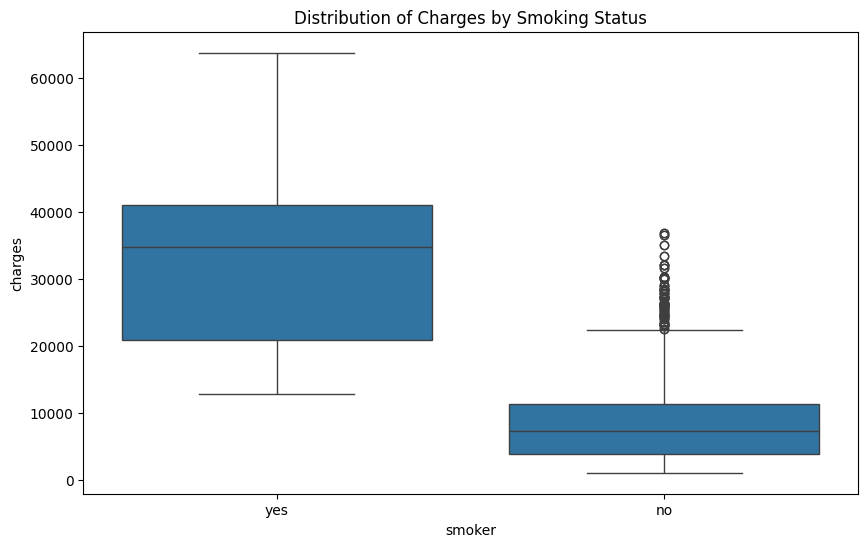

In [10]:
# 1. Distribution of Charges by Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Distribution of Charges by Smoking Status')
plt.show()

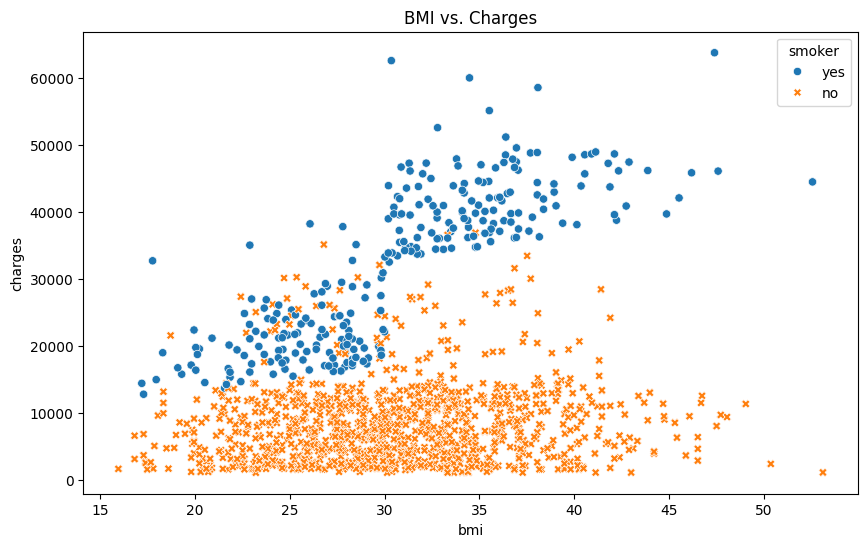

In [11]:
# 2. BMI vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', style='smoker', data=df)
plt.title('BMI vs. Charges')
plt.show()

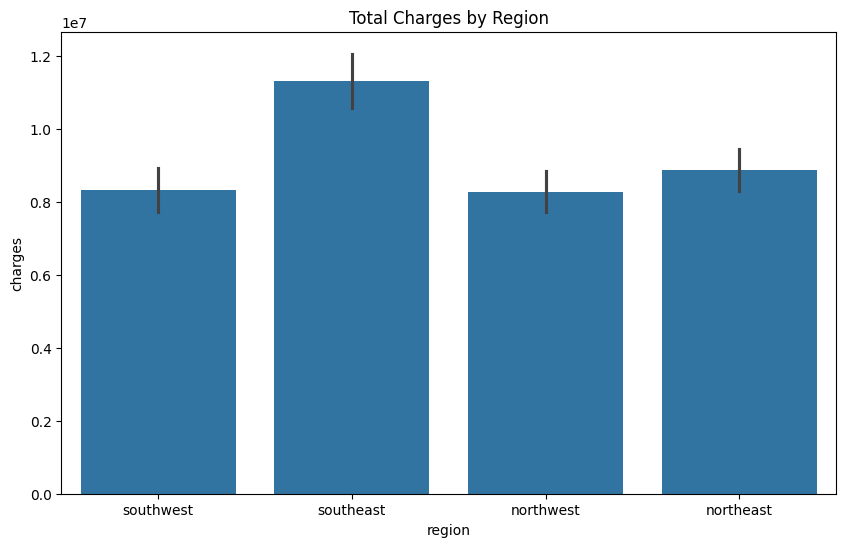

In [12]:
# 3. Charges by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=df, estimator=sum)
plt.title('Total Charges by Region')
plt.show()

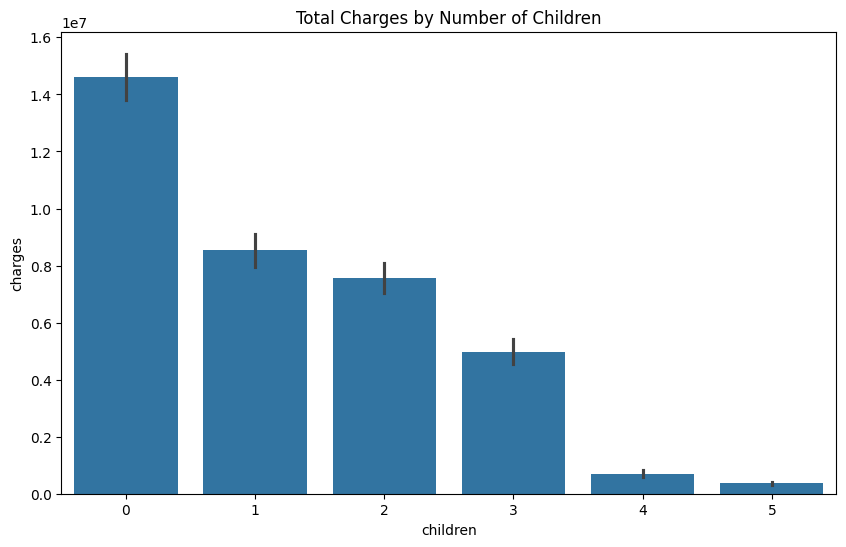

In [13]:
# 4. Charges by Number of Children
plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='charges', data=df, estimator=sum)
plt.title('Total Charges by Number of Children')
plt.show()

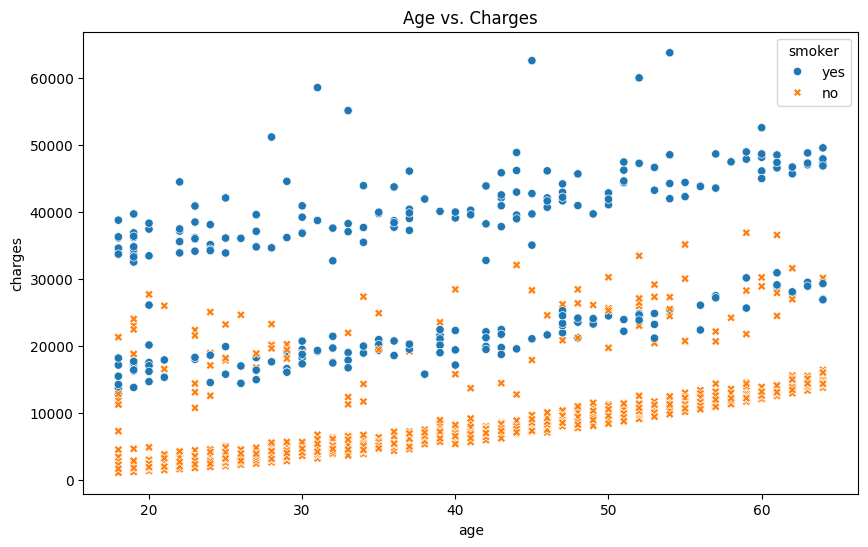

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', style='smoker', data=df)
plt.title('Age vs. Charges')
plt.show()

In [15]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [16]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()

# Encode categorical columns
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2,8569.86180
2768,21,0,34.600,0,0,3,2020.17700
2769,19,1,26.030,1,1,1,16450.89470
2770,23,1,18.715,0,0,1,21595.38229


In [19]:
# Save the LabelEncoder
import joblib
joblib.dump(le, 'label_encoder.pkl')
print("LabelEncoder has been saved.")

LabelEncoder has been saved.


#Model Building


In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='charges')
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (2217, 6), X_test size: (555, 6)


In [21]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2
2768,21,0,34.600,0,0,3
2769,19,1,26.030,1,1,1
2770,23,1,18.715,0,0,1


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_and_predict(X_train, X_test, y_train, y_test, models):
    results = {}

    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        # Store results
        results[name] = {
            'R^2 Score': r2,
            'Mean Absolute Error': mae,
            'Mean Squared Error': mse,
            'Predictions': y_pred
        }

        # Print metrics
        print(f"{name} Metrics:")
        print(f"  R^2 Score: {r2:.4f}")
        print(f"  Mean Absolute Error: {mae:.4f}")
        print(f"  Mean Squared Error: {mse:.4f}")
        print()

    return results

# Define the models to evaluate
models_to_evaluate = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42)
}

# Call the function to evaluate and predict
evaluation_results = evaluate_and_predict(X_train, X_test, y_train, y_test, models_to_evaluate)



Linear Regression Metrics:
  R^2 Score: 0.7464
  Mean Absolute Error: 4188.8851
  Mean Squared Error: 37790547.0033

Random Forest Regression Metrics:
  R^2 Score: 0.9614
  Mean Absolute Error: 1194.7240
  Mean Squared Error: 5758393.7818

Decision Tree Regression Metrics:
  R^2 Score: 0.9760
  Mean Absolute Error: 301.5468
  Mean Squared Error: 3577197.2380



In [23]:
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_and_predict(X_train, X_test, y_train, y_test, models):
    results = {}

    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        # Store results
        results[name] = {
            'R^2 Score': r2,
            'Mean Absolute Error': mae,
            'Mean Squared Error': mse,
            'Predictions': y_pred
        }

        # Print metrics
        print(f"{name} Metrics:")
        print(f"  R^2 Score: {r2:.4f}")
        print(f"  Mean Absolute Error: {mae:.4f}")
        print(f"  Mean Squared Error: {mse:.4f}")
        print()

    return results

# Define the models to evaluate
models_to_evaluate = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42)
}

# Call the function to evaluate and predict
evaluation_results = evaluate_and_predict(X_train, X_test, y_train, y_test, models_to_evaluate)

# Save the Random Forest model
random_forest_model = models_to_evaluate['Random Forest Regression']
joblib.dump(random_forest_model, 'random_forest_model.pkl')
print("Random Forest model has been saved to 'random_forest_model.pkl'")


Linear Regression Metrics:
  R^2 Score: 0.7464
  Mean Absolute Error: 4188.8851
  Mean Squared Error: 37790547.0033

Random Forest Regression Metrics:
  R^2 Score: 0.9614
  Mean Absolute Error: 1194.7240
  Mean Squared Error: 5758393.7818

Decision Tree Regression Metrics:
  R^2 Score: 0.9760
  Mean Absolute Error: 301.5468
  Mean Squared Error: 3577197.2380

Random Forest model has been saved to 'random_forest_model.pkl'


#prediction

In [24]:
def predict_insurance_charge(model, age, sex, bmi, children, smoker, region):
    # Prepare input data as a 2D array for prediction
    X_new = [[age, sex, bmi, children, smoker, region]]

    # Predict using the provided model
    predicted_charge = model.predict(X_new)[0]

    return predicted_charge


In [25]:

#  models_to_evaluate contains our trained models
# Choose one of the evaluated models
selected_model = models_to_evaluate['Random Forest Regression']
# Example features for prediction
age = 28
sex = 1  # 1 for male, 0 for female
bmi = 33.0
children = 3
smoker = 0  # 1 for yes, 0 for no
region = 2  # Using the encoding: 'southeast' -> 2

# Predict insurance charge using the selected model
predicted_charge = predict_insurance_charge(selected_model, age, sex, bmi, children, smoker, region)

print(f"Predicted Insurance Charge: ${predicted_charge:.2f}")


Predicted Insurance Charge: $4453.55


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
